In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import difflib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
df = pd.read_csv('tmdb_5000_movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",9/4/1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],12/26/2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 

PART 1: DATASET DESCRIPTION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
df.shape

(4803, 20)

In [7]:
# Display the first few rows and column names with data types for documentation
df_info = {
    "columns": df.columns.tolist(),
    "sample_data": df.head(),
    "data_types": df.dtypes.to_dict()
}
df_info

{'columns': ['budget',
  'genres',
  'homepage',
  'id',
  'keywords',
  'original_language',
  'original_title',
  'overview',
  'popularity',
  'production_companies',
  'production_countries',
  'release_date',
  'revenue',
  'runtime',
  'spoken_languages',
  'status',
  'tagline',
  'title',
  'vote_average',
  'vote_count'],
 'sample_data':       budget                                             genres  \
 0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
 2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
 4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 
                                        homepage      id  \
 0                   http://www.avatarmovie.com/   19995   
 1  http://disney.go.com/disneypictures/pirates/     285   
 2   http://www.sonypictures.com/movies/spectre/  206647   
 3

Part 2

In [8]:
print("First 10 rows of dataset.\n")
df.head(10)

First 10 rows of dataset.



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/1/2007,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11/24/2010,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag.

In [9]:
print("\nStatistical summary of dataset.\n")
df.describe()


Statistical summary of dataset.



,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Data cleaning

In [11]:
df.isnull().sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [14]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Fill categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-14-a8ee9791bb7d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [15]:
df.isnull().sum()

# Verify no missing values
if df.isnull().sum().sum() == 0:
    print("\nNo missing values found in the dataset.")
else:
    print("\nThere are still some missing values. Additional handling may be required.")


No missing values found in the dataset.


In [ ]:
#

In [16]:
df.to_csv('cleaned_data.csv', index=False)
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Data transformation

In [17]:
df = pd.read_csv('cleaned_data.csv')

In [18]:
df.columns.tolist()

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

In [19]:
total_genre_count = df['genres'].value_counts().sum()
print(total_genre_count)


4803


In [20]:
df['overview']

,overview
0,"In the 22nd century, a paraplegic Marine is di..."
1,"Captain Barbossa, long believed to be dead, ha..."
2,A cryptic message from Bond’s past sends him o...
3,Following the death of District Attorney Harve...
4,"John Carter is a war-weary, former military ca..."
...,...
4798,El Mariachi just wants to play his guitar and ...
4799,A newlywed couple's honeymoon is upended by th...
4800,"""Signed, Sealed, Delivered"" introduces a dedic..."
4801,When ambitious New York attorney Sam is sent t...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              4803 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4803 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4803 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [22]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [23]:
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [24]:
categorical_columns = ['original_language', 'status']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [25]:
# Convert to datetime and extract year, month, day
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day
df[['release_date', 'release_year', 'release_month', 'release_day']]

,release_date,release_year,release_month,release_day
0,2009-12-10,2009,12,10
1,2007-05-19,2007,5,19
2,2015-10-26,2015,10,26
3,2012-07-16,2012,7,16
4,2012-03-07,2012,3,7
...,...,...,...,...
4798,1992-09-04,1992,9,4
4799,2011-12-26,2011,12,26
4800,2013-10-13,2013,10,13
4801,2012-05-03,2012,5,3


In [26]:
df['budget'] = df['budget'].astype(float)
# Define budget categories for simplicity: Low, Medium, and High based on percentiles
df['budget_category'] = pd.cut(df['budget'], bins=[0, 1e7, 5e7, df['budget'].max()],
                                 labels=['Low', 'Medium', 'High'], include_lowest=True)

df[['budget', 'budget_category']]


,budget,budget_category
0,237000000.0,High
1,300000000.0,High
2,245000000.0,High
3,250000000.0,High
4,260000000.0,High
...,...,...
4798,220000.0,Low
4799,9000.0,Low
4800,0.0,Low
4801,0.0,Low


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   float64       
 1   genres                4803 non-null   object        
 2   homepage              4803 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   category      
 6   original_title        4803 non-null   object        
 7   overview              4803 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4803 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [28]:

numerical_data = df[['runtime', 'vote_average', 'vote_count']]

# Initialize the StandardScaler (this performs Z-score standardization)
scaler = StandardScaler()

# Fit and transform the numerical data
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)

# Optionally, add the scaled features back to the original DataFrame
df[['scaled_runtime', 'scaled_vote_average', 'scaled_vote_count']] = scaled_df


In [29]:
print(df.head())

        budget                                             genres  \
0  237000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000.0  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000.0  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   float64       
 1   genres                4803 non-null   object        
 2   homepage              4803 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   category      
 6   original_title        4803 non-null   object        
 7   overview              4803 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4803 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

Normalization and Standardization.

In [31]:
cols = ['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year', 'release_month', 'release_day', 'scaled_runtime', 'scaled_vote_average', 'scaled_vote_count']

In [35]:
normalized_df = df.copy()
min_max_scaler = MinMaxScaler()
normalized_df[cols] = min_max_scaler.fit_transform(normalized_df[cols])

print("Normalized Data Sample:")
print(normalized_df[cols].head())

Normalized Data Sample:
     budget        id  popularity   revenue   runtime  vote_average  \
0  0.623684  0.043505    0.171815  1.000000  0.479290          0.72   
1  0.789474  0.000609    0.158846  0.344696  0.500000          0.69   
2  0.644737  0.449727    0.122635  0.315884  0.437870          0.63   
3  0.657895  0.106687    0.128272  0.389151  0.488166          0.76   
4  0.684211  0.107782    0.050169  0.101916  0.390533          0.61   

   vote_count  release_year  release_month  release_day  scaled_runtime  \
0    0.858057      0.920792       1.000000     0.300000        0.479290   
1    0.327225      0.900990       0.363636     0.600000        0.500000   
2    0.324753      0.980198       0.818182     0.833333        0.437870   
3    0.662158      0.950495       0.545455     0.500000        0.488166   
4    0.154450      0.950495       0.181818     0.200000        0.390533   

   scaled_vote_average  scaled_vote_count  
0                 0.72           0.858057  
1         

In [36]:
standardized_df = df.copy()
standard_scaler = StandardScaler()
standardized_df[cols] = standard_scaler.fit_transform(standardized_df[cols])

print("\nStandardized Data Sample:")
print(standardized_df[cols].head())


Standardized Data Sample:
     budget        id  popularity    revenue   runtime  vote_average  \
0  5.107181 -0.419128    4.053183  16.615709  2.438652      0.927451   
1  6.654402 -0.641374    3.696258   5.396331  2.748318      0.676297   
2  5.303653  1.685526    2.699638   4.903054  1.819320      0.173990   
3  5.426449 -0.091779    2.854798   6.157440  2.571366      1.262322   
4  5.672039 -0.086108    0.705198   1.239734  1.111513      0.006554   

   vote_count  release_year  release_month  release_day  scaled_runtime  \
0    8.999729      0.526150       1.520016    -0.598708        2.438652   
1    3.086200      0.365014      -0.524081     0.442210        2.748318   
2    3.058657      1.009558       0.935989     1.251812        1.819320   
3    6.817394      0.767854       0.059947     0.095237        2.571366   
4    1.161467      0.767854      -1.108108    -0.945680        1.111513   

   scaled_vote_average  scaled_vote_count  
0             0.927451           8.999729  
1

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   float64       
 1   genres                4803 non-null   object        
 2   homepage              4803 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   category      
 6   original_title        4803 non-null   object        
 7   overview              4803 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4803 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [38]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,release_year,release_month,release_day,budget_category,scaled_runtime,scaled_vote_average,scaled_vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Avatar,7.2,11800,2009,12,10,High,2.438652,0.927451,8.999729
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19,High,2.748318,0.676297,3.086200
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Spectre,6.3,4466,2015,10,26,High,1.819320,0.173990,3.058657
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Dark Knight Rises,7.6,9106,2012,7,16,High,2.571366,1.262322,6.817394
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,John Carter,6.1,2124,2012,3,7,High,1.111513,0.006554,1.161467


In [39]:
df.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [40]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L



In [41]:
df['genres']= df['genres'].apply(convert)

In [42]:
df['keywords']= df['keywords'].apply(convert)

In [43]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,release_year,release_month,release_day,budget_category,scaled_runtime,scaled_vote_average,scaled_vote_count
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Avatar,7.2,11800,2009,12,10,High,2.438652,0.927451,8.999729
1,300000000.0,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19,High,2.748318,0.676297,3.086200
2,245000000.0,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Spectre,6.3,4466,2015,10,26,High,1.819320,0.173990,3.058657
3,250000000.0,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Dark Knight Rises,7.6,9106,2012,7,16,High,2.571366,1.262322,6.817394
4,260000000.0,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,John Carter,6.1,2124,2012,3,7,High,1.111513,0.006554,1.161467


In [44]:
# Flatten the list of genres
all_genres = [genre for sublist in df['genres'] for genre in sublist]

# Get unique genres
unique_genres = set(all_genres)

# Calculate the total number of unique genres
total_genres = len(unique_genres)

# Print the total number of genres and their names
print(f'Total number of unique genres: {total_genres}')
print('Genres:', unique_genres)

Total number of unique genres: 20
Genres: {'Thriller', 'Animation', 'Horror', 'War', 'Documentary', 'Action', 'Music', 'Romance', 'Adventure', 'Western', 'History', 'Comedy', 'Drama', 'Family', 'TV Movie', 'Fantasy', 'Crime', 'Foreign', 'Science Fiction', 'Mystery'}


In [45]:
# Flatten the list of languages
all_languages = [language for sublist in df['original_language'] for language in sublist]

# Get unique languages
unique_languages = set(all_languages)

# Calculate the total number of unique languages
total_languages = len(unique_languages)

# Print the total number of languages and their names
print(f'Total number of unique languages: {total_languages}')
print('Languages:', unique_languages)

Total number of unique languages: 22
Languages: {'l', 'z', 'p', 's', 'e', 't', 'v', 'b', 'k', 'x', 'y', 'h', 'u', 'r', 'f', 'c', 'a', 'i', 'j', 'd', 'n', 'o'}


In [46]:
genres_encoded = df['genres'].explode().str.get_dummies()

# Group by the original index and sum to get back to the original DataFrame shape
genres_encoded = genres_encoded.groupby(genres_encoded.index).sum()

# Concatenate the one-hot encoded genres with the original DataFrame
df = pd.concat([df, genres_encoded], axis=1)

# Display the updated DataFrame
print(df.head())


        budget                                         genres  \
0  237000000.0  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000.0                   [Adventure, Fantasy, Action]   
2  245000000.0                     [Action, Adventure, Crime]   
3  250000000.0               [Action, Crime, Drama, Thriller]   
4  260000000.0           [Action, Adventure, Science Fiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret 

In [47]:
language_encoded = pd.get_dummies(df['original_language'], prefix='language')

# Concatenate the one-hot encoded languages with the original DataFrame
df = pd.concat([df, language_encoded], axis=1)

# Display the updated DataFrame with encoded languages
print(df.head())

        budget                                         genres  \
0  237000000.0  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000.0                   [Adventure, Fantasy, Action]   
2  245000000.0                     [Action, Adventure, Crime]   
3  250000000.0               [Action, Crime, Drama, Thriller]   
4  260000000.0           [Action, Adventure, Science Fiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret 

3 Data Visulization

In [48]:
#df.to_csv('processed_data.csv')

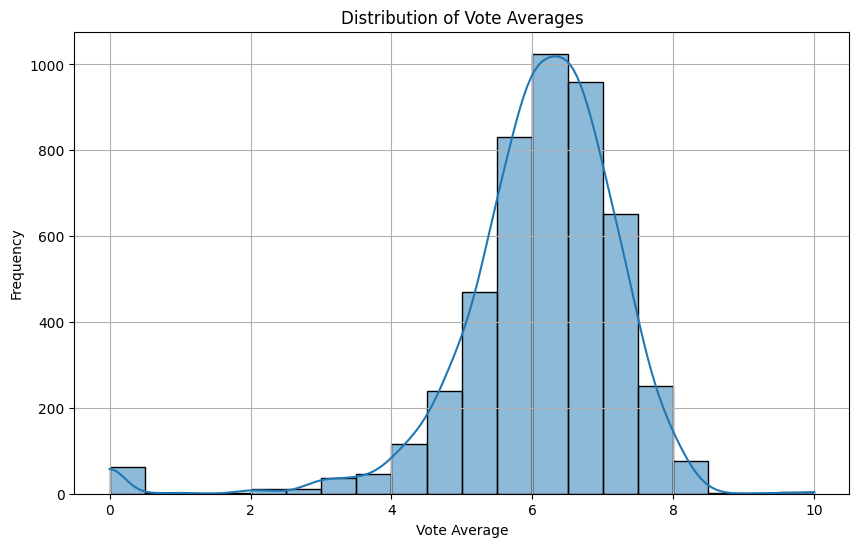

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.grid()
plt.show()

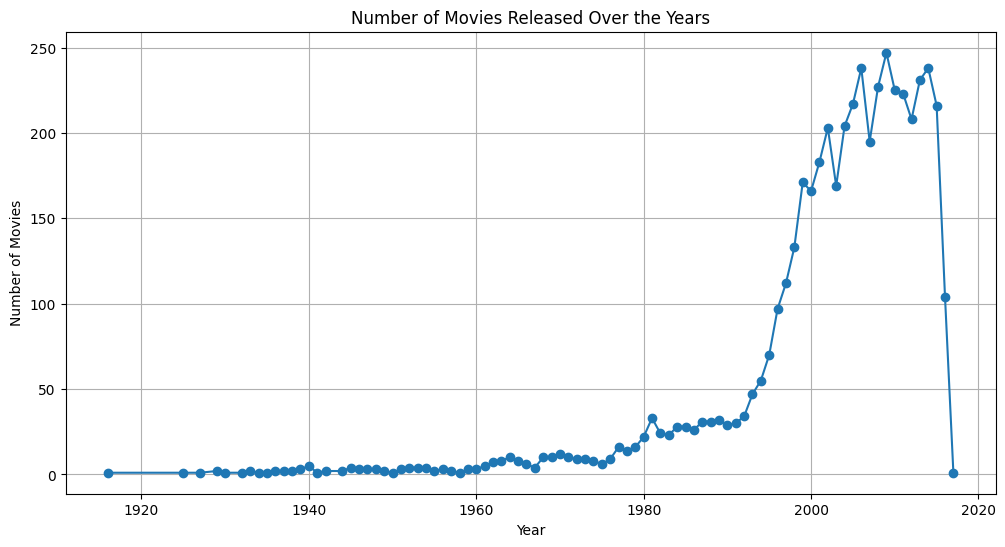

In [50]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year

# Count movies per year
movies_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line', marker='o')
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid()
plt.show()

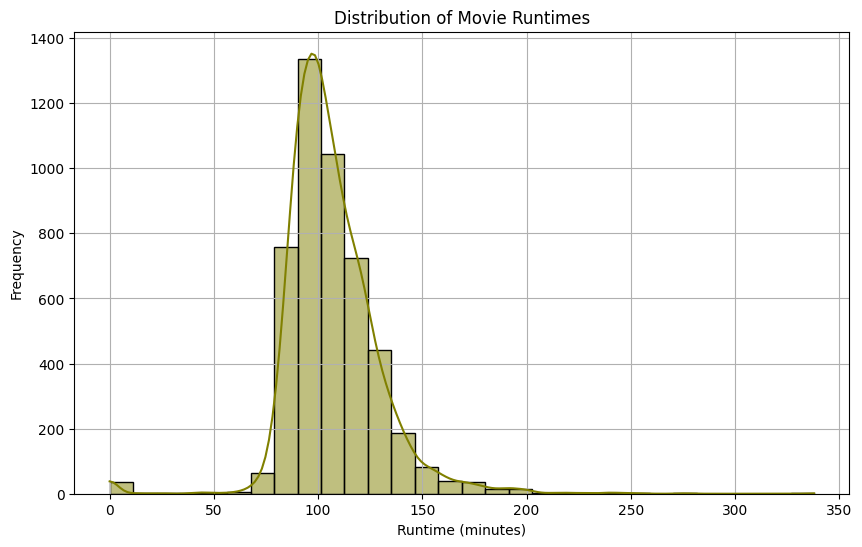

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=30, kde=True, color='olive')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [53]:
# Calculate average vote by genre
avg_vote_by_genre = df.explode('genres').groupby('genres')['vote_average'].mean().sort_values(ascending=False)

# Display the result
print("\nAverage Vote by Genre:")
print(avg_vote_by_genre)


Average Vote by Genre:
genres
History            6.719797
War                6.713889
Drama              6.388594
Music              6.355676
Foreign            6.352941
Animation          6.341453
Crime              6.274138
Documentary        6.238182
Romance            6.207718
Mystery            6.183908
Western            6.178049
Adventure          6.156962
Fantasy            6.096698
Family             6.029630
Thriller           6.010989
Science Fiction    6.005607
Action             5.989515
Comedy             5.945587
TV Movie           5.662500
Horror             5.626590
Name: vote_average, dtype: float64


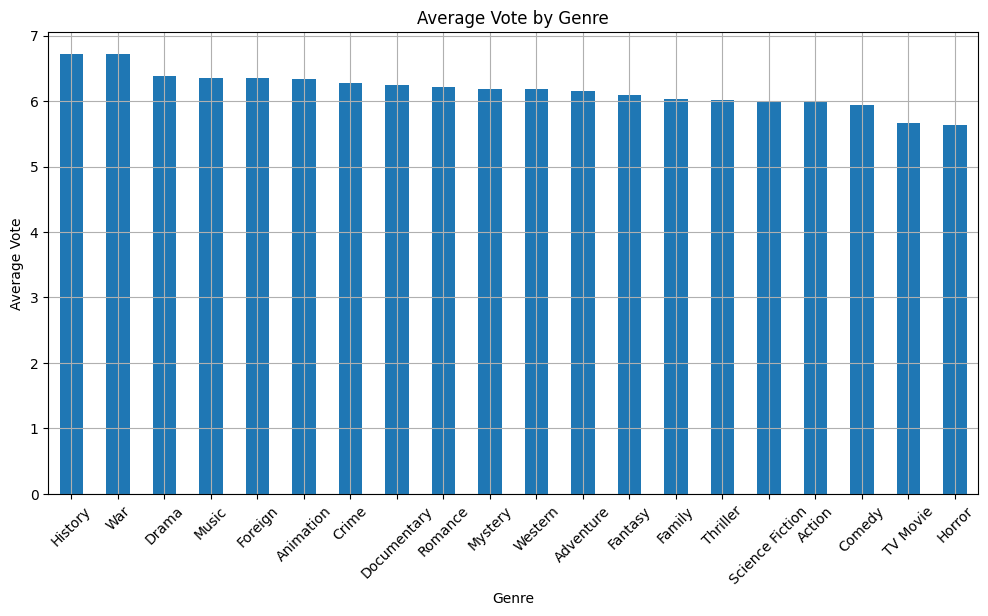

In [54]:

plt.figure(figsize=(12, 6))
avg_vote_by_genre.plot(kind='bar')
plt.title('Average Vote by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Vote')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   float64       
 1   genres                4803 non-null   object        
 2   homepage              4803 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   category      
 6   original_title        4803 non-null   object        
 7   overview              4803 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4803 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [56]:
# Calculate the sum of one-hot encoded language columns
language_columns = language_encoded.columns  # Get the names of the encoded language columns
language_counts = df[language_columns].sum()

# Print language counts for verification
print(language_counts)

language_af       1
language_ar       2
language_cn      12
language_cs       2
language_da       7
language_de      27
language_el       1
language_en    4505
language_es      32
language_fa       4
language_fr      70
language_he       3
language_hi      19
language_hu       1
language_id       2
language_is       1
language_it      14
language_ja      16
language_ko      11
language_ky       1
language_nb       1
language_nl       4
language_no       1
language_pl       1
language_ps       1
language_pt       9
language_ro       2
language_ru      11
language_sl       1
language_sv       5
language_ta       2
language_te       1
language_th       3
language_tr       1
language_vi       1
language_xx       1
language_zh      27
dtype: int64


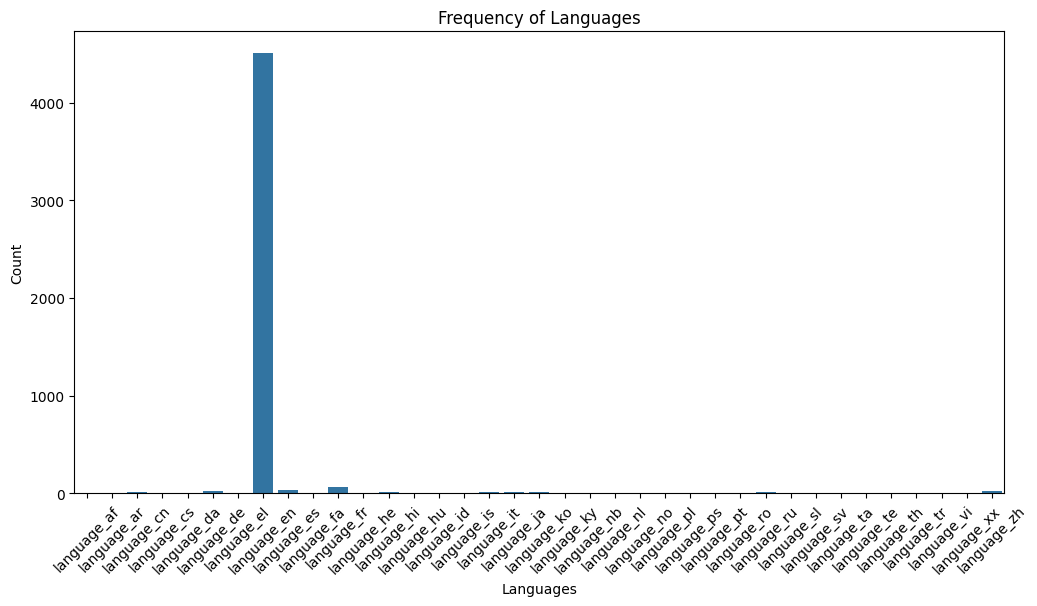

In [57]:
# Create a bar plot for languages
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Frequency of Languages')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [58]:
# Specify the list of encoded genres
encoded_genres = [
    'Science Fiction', 'Foreign', 'Thriller', 'History', 'Mystery',
    'Animation', 'Drama', 'War', 'Action', 'Music',
    'Crime', 'Adventure', 'Documentary', 'Comedy', 'Fantasy',
    'Family', 'Western', 'Horror', 'TV Movie', 'Romance'
]

# Calculate the sum of one-hot encoded genre columns
genre_counts = df[encoded_genres].sum()

# Print genre counts for verification
print(genre_counts)

Science Fiction     535
Foreign              34
Thriller           1274
History             197
Mystery             348
Animation           234
Drama              2297
War                 144
Action             1154
Music               185
Crime               696
Adventure           790
Documentary         110
Comedy             1722
Fantasy             424
Family              513
Western              82
Horror              519
TV Movie              8
Romance             894
dtype: int64


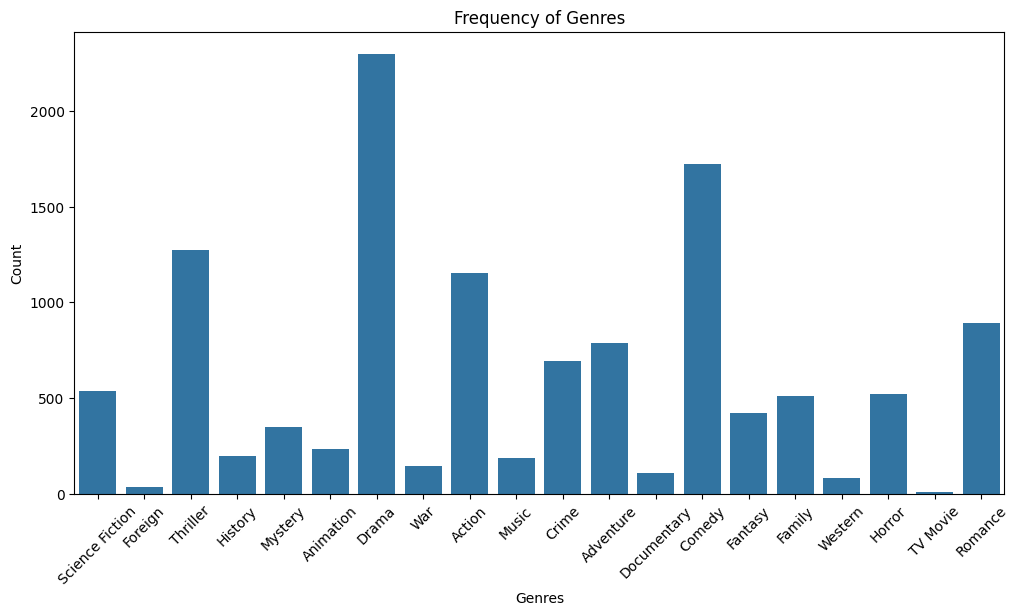

In [59]:
# Create a bar plot for genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Frequency of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [60]:
# UNIVARIATE ANALYSIS

# Summary statistics for numerical data
print(df[['runtime', 'vote_average', 'vote_count', 'scaled_runtime', 'scaled_vote_average', 'scaled_vote_count']].describe())

# Summary statistics for encoded languages and genres
print(df[df.columns[df.columns.str.startswith('language')]].sum())
print(df[df.columns[df.columns.str.startswith('genre_')]].sum())


           runtime  vote_average    vote_count  scaled_runtime  \
count  4803.000000   4803.000000   4803.000000    4.803000e+03   
mean    106.874245      6.092172    690.217989   -3.077095e-16   
std      22.607364      1.194612   1234.585891    1.000104e+00   
min       0.000000      0.000000      0.000000   -4.727901e+00   
25%      94.000000      5.600000     54.000000   -5.695306e-01   
50%     103.000000      6.200000    235.000000   -1.713888e-01   
75%     117.500000      6.800000    737.000000    4.700619e-01   
max     338.000000     10.000000  13752.000000    1.022454e+01   

       scaled_vote_average  scaled_vote_count  
count         4.803000e+03       4.803000e+03  
mean         -3.668844e-16      -4.733993e-17  
std           1.000104e+00       1.000104e+00  
min          -5.100238e+00      -5.591266e-01  
25%          -4.120357e-01      -5.153827e-01  
50%           9.027170e-02      -3.687596e-01  
75%           5.925790e-01       3.789682e-02  
max           3.27155

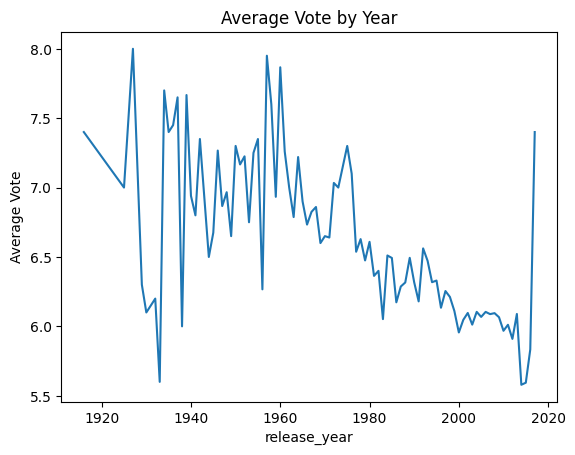

In [61]:
# Example: trend in vote_average over release years (assuming 'release_year' column)
df.groupby('release_year')['vote_average'].mean().plot(kind='line', title='Average Vote by Year')
plt.ylabel('Average Vote')
plt.show()


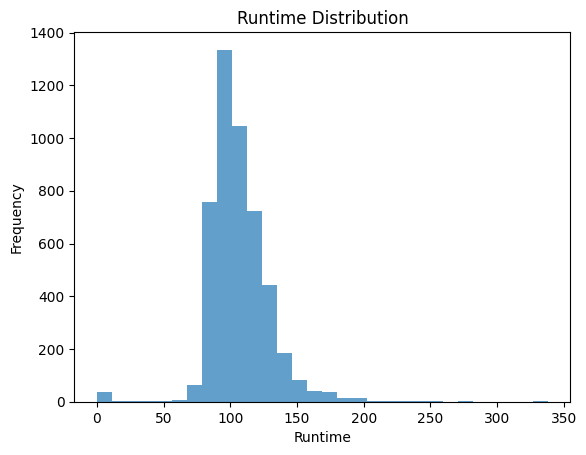

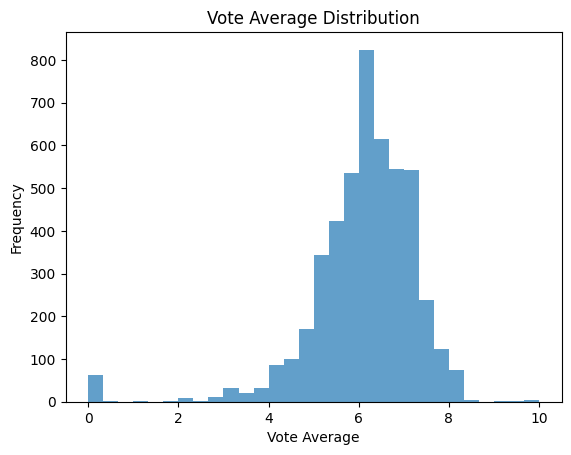

In [62]:
df['runtime'].plot(kind='hist', bins=30, title='Runtime Distribution', alpha=0.7)
plt.xlabel('Runtime')
plt.show()

df['vote_average'].plot(kind='hist', bins=30, title='Vote Average Distribution', alpha=0.7)
plt.xlabel('Vote Average')
plt.show()

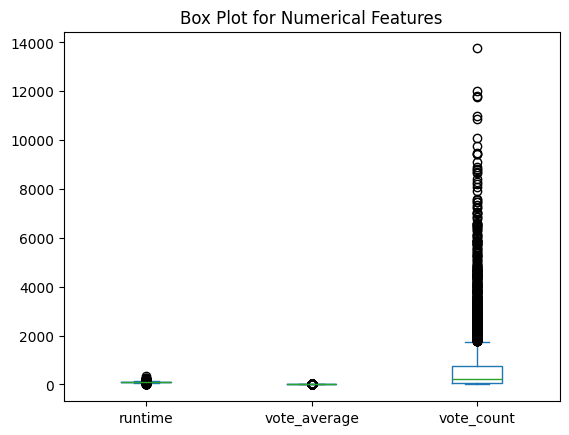

In [63]:
df[['runtime', 'vote_average', 'vote_count']].plot(kind='box', title='Box Plot for Numerical Features')
plt.show()


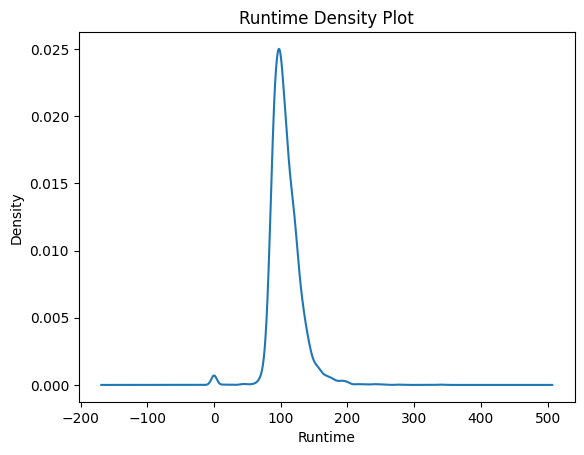

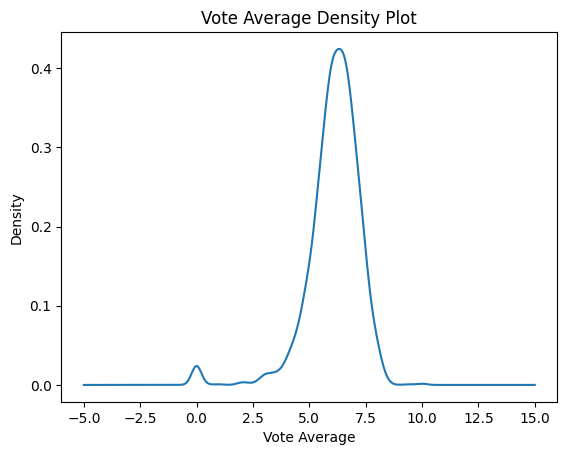

In [64]:
df['runtime'].plot(kind='density', title='Runtime Density Plot')
plt.xlabel('Runtime')
plt.show()

df['vote_average'].plot(kind='density', title='Vote Average Density Plot')
plt.xlabel('Vote Average')
plt.show()


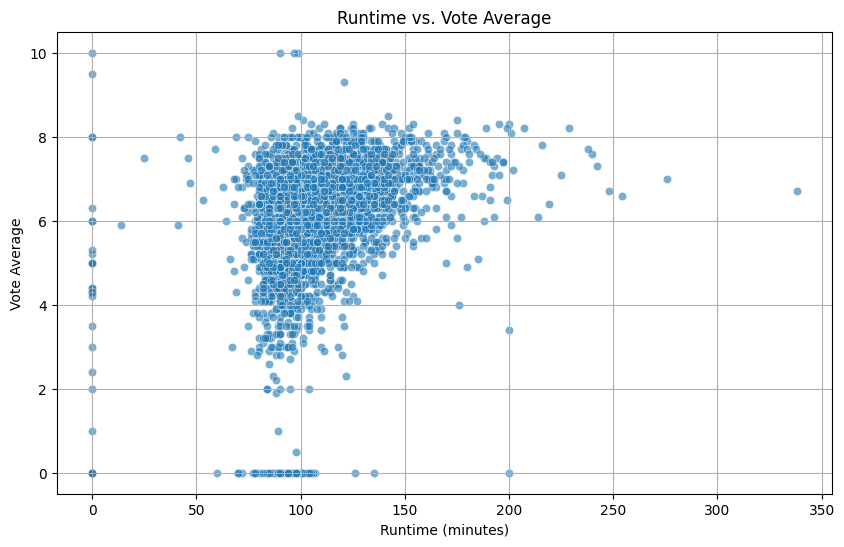

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='runtime', y='vote_average', alpha=0.6,)
plt.title('Runtime vs. Vote Average')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Vote Average')
plt.grid()
plt.show()

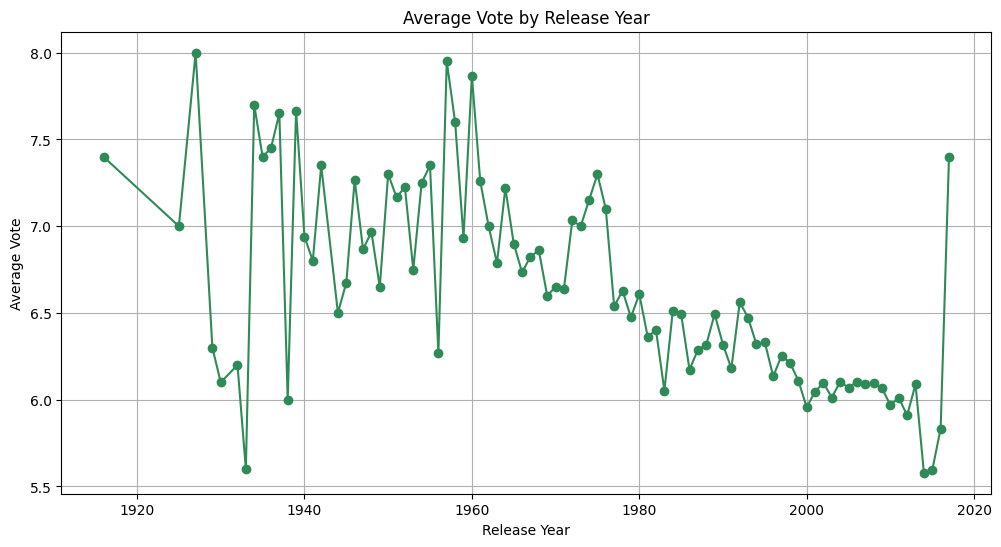

In [66]:
# Calculate average vote by release year
avg_vote_by_year = df.groupby('release_year')['vote_average'].mean()

plt.figure(figsize=(12, 6))
avg_vote_by_year.plot(kind='line', marker='o', color='seagreen')
plt.title('Average Vote by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Vote')
plt.grid()
plt.show()

<ipython-input-67-bec4223d0360>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')


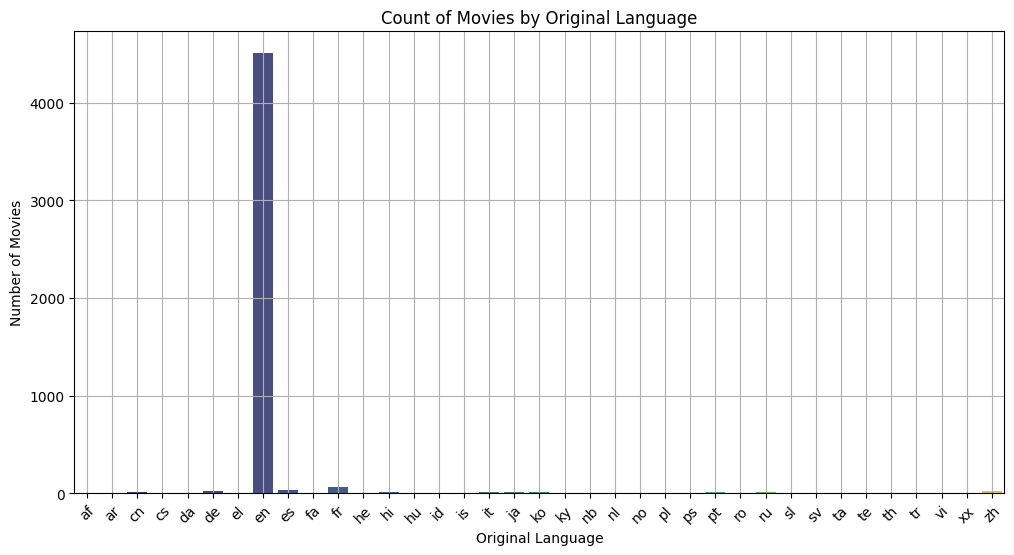

In [67]:
language_counts = df['original_language'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')
plt.title('Count of Movies by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Error: Genre columns contain non-numeric data.


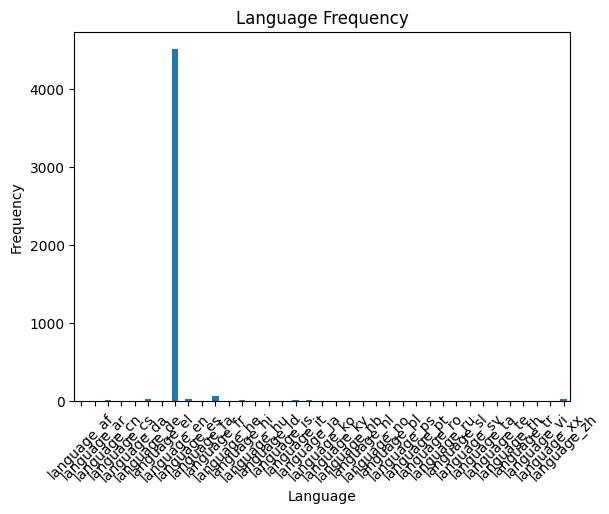

In [68]:
genre_columns = df.columns[df.columns.str.startswith('genres')]
if not df[genre_columns].apply(pd.to_numeric, errors='coerce').notnull().all().all():
    print("Error: Genre columns contain non-numeric data.")
else:
    genres_count = df[genre_columns].sum()
    genres_count.plot(kind='bar', title='Genre Frequency')
    plt.xlabel('Genre')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()

# Example: Languages
# Ensure the language columns are numeric (0s and 1s)
language_columns = df.columns[df.columns.str.startswith('language')]
if not df[language_columns].apply(pd.to_numeric, errors='coerce').notnull().all().all():
    print("Error: Language columns contain non-numeric data.")
else:
    language_count = df[language_columns].sum()
    language_count.plot(kind='bar', title='Language Frequency')
    plt.xlabel('Language')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()

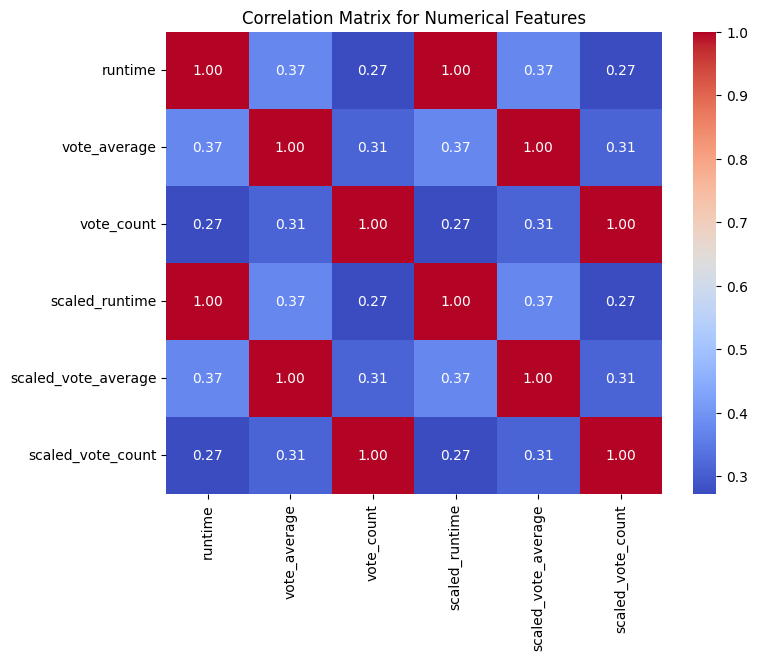

In [69]:
# BIVARIATE ANALYSIS
# Calculate correlation matrix for numerical variables
numerical_data = df[['runtime', 'vote_average', 'vote_count', 'scaled_runtime', 'scaled_vote_average', 'scaled_vote_count']]
corr_matrix = numerical_data.corr()

# Plot correlation matrix as a heat map
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()


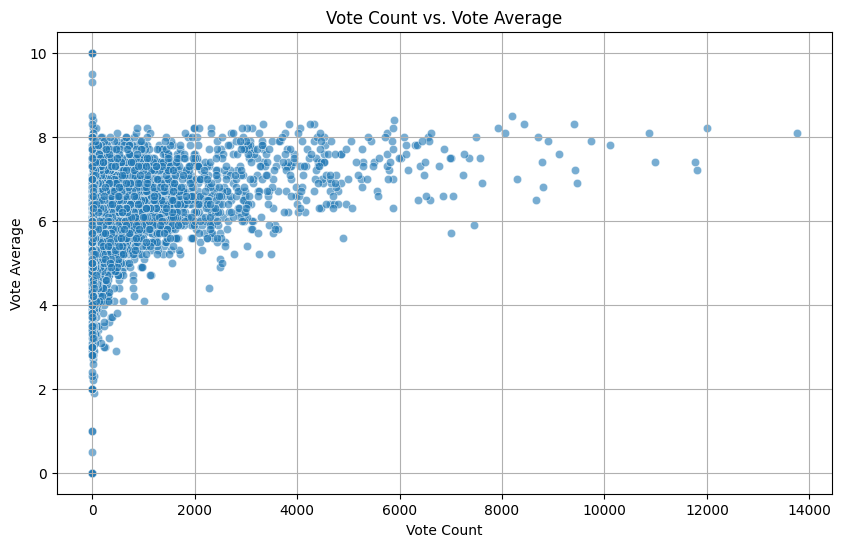

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vote_count', y='vote_average', alpha=0.6)
plt.title('Vote Count vs. Vote Average')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.grid()
plt.show()

In [71]:
print(df['genres'])

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object


<ipython-input-72-77bdf947406b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')


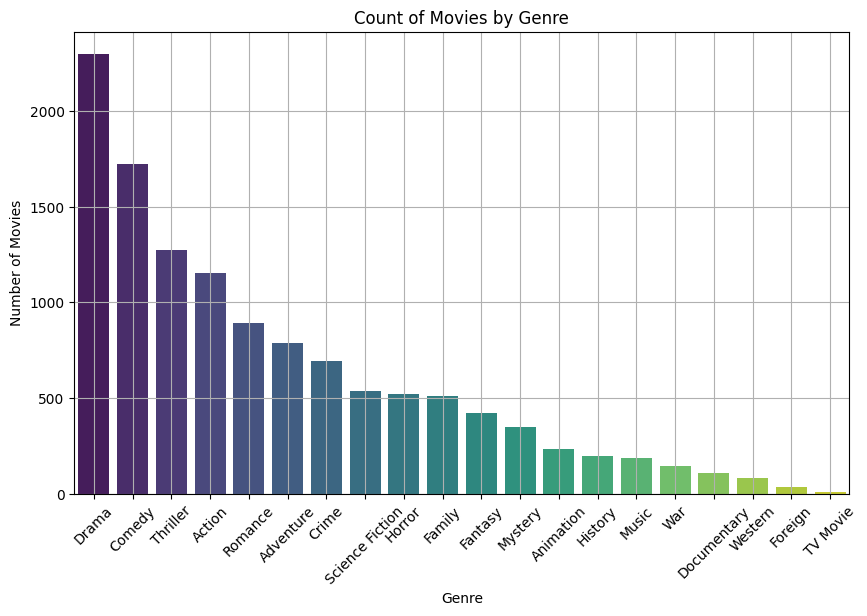

In [72]:
# Explode genre_names to count occurrences
exploded_genres = df.explode('genres')

# Count movies by genre
genre_counts = exploded_genres['genres'].value_counts()
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')
plt.title('Count of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid()

<Figure size 1400x800 with 0 Axes>

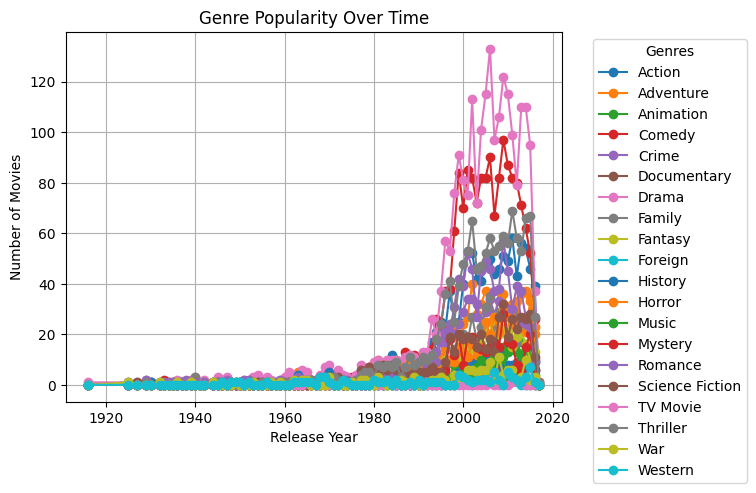

In [73]:
# Count movies by genre per year
genre_trend = df.explode('genres').groupby(['release_year', 'genres']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
genre_trend.plot(kind='line', marker='o')
plt.title('Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

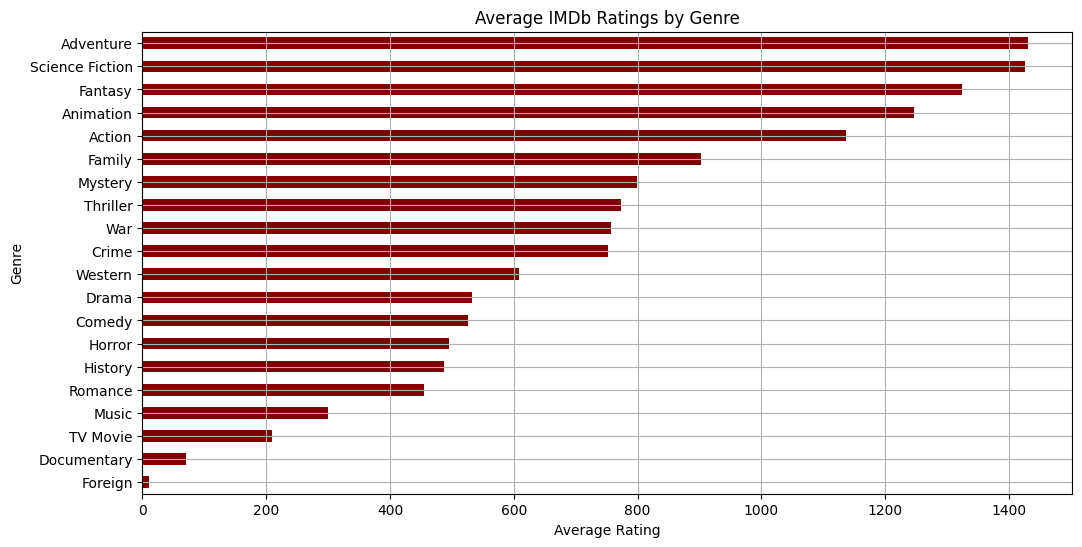

In [74]:
# Calculate average ratings by genre
avg_rating_by_genre = exploded_genres.groupby('genres')['vote_count'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_rating_by_genre.plot(kind='barh', color='maroon')
plt.title('Average IMDb Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.grid()
plt.show()

In [75]:
df.to_csv('processed_data.csv')
df = pd.read_csv('processed_data.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4803 non-null   int64  
 1   budget                4803 non-null   float64
 2   genres                4803 non-null   object 
 3   homepage              4803 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4803 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4803 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4803 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4803 non-null   float64
 15  spoken_languages     

In [77]:
df.shape

(4803, 85)

In [78]:
numeric_df=df.select_dtypes(include='number')
categorical_df=df.select_dtypes(exclude='number')
print(df.isnull())

      Unnamed: 0  budget  genres  homepage     id  keywords  \
0          False   False   False     False  False     False   
1          False   False   False     False  False     False   
2          False   False   False     False  False     False   
3          False   False   False     False  False     False   
4          False   False   False     False  False     False   
...          ...     ...     ...       ...    ...       ...   
4798       False   False   False     False  False     False   
4799       False   False   False     False  False     False   
4800       False   False   False     False  False     False   
4801       False   False   False     False  False     False   
4802       False   False   False     False  False     False   

      original_language  original_title  overview  popularity  ...  \
0                 False           False     False       False  ...   
1                 False           False     False       False  ...   
2                 False          

In [79]:
df[numeric_df.columns]=numeric_df.fillna(numeric_df.mean())
df[categorical_df.columns]=categorical_df.fillna(categorical_df.mode().iloc[0])
df.isnull().sum()

,0
Unnamed: 0,0
budget,0
genres,0
homepage,0
id,0
...,...
language_th,0
language_tr,0
language_vi,0
language_xx,0


In [80]:
#TASK
label_encoder = LabelEncoder()
df['vote_average'] = label_encoder.fit_transform(df['vote_average'])

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first') # For scikit-learn >= 1.2

embarked_encoded = one_hot_encoder.fit_transform(df[['spoken_languages']])

embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=one_hot_encoder.get_feature_names_out(['spoken_languages']))
df1 = pd.concat([df, embarked_encoded_df], axis=1)

df1.drop(columns=['spoken_languages'], inplace=True)

In [81]:
df.head()

,Unnamed: 0,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,language_ru,language_sl,language_sv,language_ta,language_te,language_th,language_tr,language_vi,language_xx,language_zh
0,0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,False,False,False,False,False,False,False,False,False,False
1,1,300000000.0,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,False,False,False,False,False,False,False,False,False,False
2,2,245000000.0,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,False,False,False,False,False,False,False,False,False,False
3,3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,False,False,False,False,False,False,False,False,False,False
4,4,260000000.0,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,False,False,False,False,False,False,False,False,False,False


In [82]:
#TASK
scaler=StandardScaler()
numeric_scaled=scaler.fit_transform(df1.select_dtypes(include='number'))
pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(numeric_scaled),columns=['PC1','PC2'])
pca_df['language_count']=df['spoken_languages'].apply(lambda x: len(x) if isinstance(x, list) else 0)
pca_df


,PC1,PC2,language_count
0,18.853448,-3.456651,0
1,10.516382,-1.573817,0
2,10.511718,-2.110471,0
3,12.113975,-0.135690,0
4,5.269093,-2.046183,0
...,...,...,...
4798,-1.492886,0.624422,0
4799,-2.328018,-0.242580,0
4800,-2.037465,1.164189,0
4801,-2.139028,-0.517289,0


In [118]:
columns = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']

In [120]:
feature_variances = df[columns].var()

In [130]:
feature_variances

,0
budget,1.658313e+15
popularity,1.012299e+03
runtime,5.110929e+02
vote_average,1.163238e+02
vote_count,1.524202e+06


In [124]:
explained_variance_ratio = pca.explained_variance_ratio_
pca.explained_variance_ratio_

array([9.99620659e-01, 3.19190104e-04, 5.89378917e-05, 1.59042389e-08,
       1.45423396e-08, 7.86340109e-09, 7.35314963e-09, 6.49639596e-09,
       6.33697407e-09, 6.25353915e-09, 5.79607567e-09, 5.58311353e-09,
       5.39912257e-09, 4.99379468e-09, 4.95211495e-09, 4.51929053e-09,
       4.48130374e-09, 4.36789424e-09, 4.17007016e-09, 4.14311940e-09,
       4.00418183e-09, 3.81022203e-09, 3.74113464e-09, 3.64050485e-09,
       3.52757366e-09, 3.51160995e-09, 3.44429523e-09, 3.42276873e-09,
       3.36386052e-09, 3.31920378e-09, 3.28246839e-09, 3.21304516e-09,
       3.18258182e-09, 3.16819102e-09, 3.13017439e-09, 3.11074204e-09,
       3.06109041e-09, 3.04308909e-09, 3.00767169e-09, 2.98729740e-09,
       2.94389765e-09, 2.92525908e-09, 2.89633869e-09, 2.88499513e-09,
       2.85738284e-09, 2.83560832e-09, 2.80640380e-09, 2.79015623e-09,
       2.74561001e-09, 2.71703774e-09, 2.70358199e-09, 2.67095512e-09,
       2.65757309e-09, 2.62188001e-09, 2.59231349e-09, 2.56385182e-09,
      

In [125]:
cumulative_variance = explained_variance_ratio.cumsum()

In [128]:
cumulative_variance

array([0.99962066, 0.99993985, 0.99999879, 0.9999988 , 0.99999882,
       0.99999883, 0.99999883, 0.99999884, 0.99999885, 0.99999885,
       0.99999886, 0.99999886, 0.99999887, 0.99999887, 0.99999888,
       0.99999888, 0.99999889, 0.99999889, 0.9999989 , 0.9999989 ,
       0.9999989 , 0.99999891, 0.99999891, 0.99999892, 0.99999892,
       0.99999892, 0.99999893, 0.99999893, 0.99999893, 0.99999894,
       0.99999894, 0.99999894, 0.99999895, 0.99999895, 0.99999895,
       0.99999895, 0.99999896, 0.99999896, 0.99999896, 0.99999897,
       0.99999897, 0.99999897, 0.99999898, 0.99999898, 0.99999898,
       0.99999898, 0.99999899, 0.99999899, 0.99999899, 0.999999  ,
       0.999999  , 0.999999  , 0.999999  , 0.99999901, 0.99999901,
       0.99999901, 0.99999901, 0.99999902, 0.99999902, 0.99999902,
       0.99999902, 0.99999903, 0.99999903, 0.99999903, 0.99999903,
       0.99999904, 0.99999904, 0.99999904, 0.99999904, 0.99999904,
       0.99999905, 0.99999905, 0.99999905, 0.99999905, 0.99999

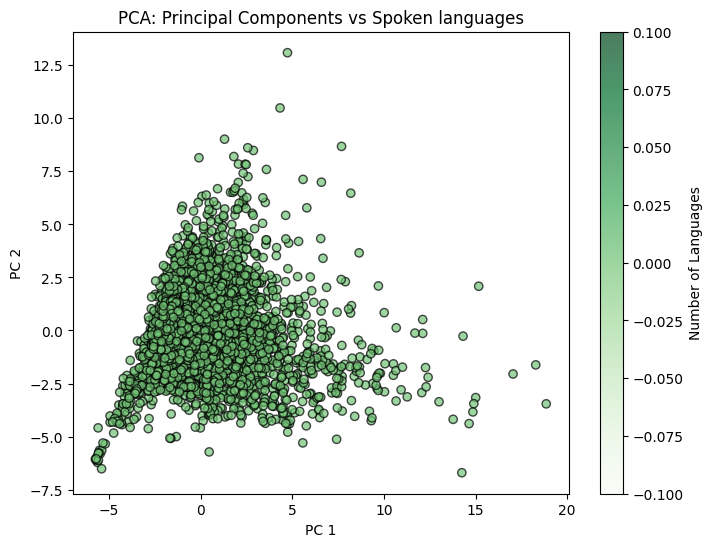

In [84]:
#TASk
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['language_count'], cmap='Greens', edgecolor='k', alpha=0.7)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA: Principal Components vs Spoken languages')

plt.colorbar(scatter, label='Number of Languages')

plt.show()

In [85]:
df.head()

,Unnamed: 0,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,language_ru,language_sl,language_sv,language_ta,language_te,language_th,language_tr,language_vi,language_xx,language_zh
0,0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,False,False,False,False,False,False,False,False,False,False
1,1,300000000.0,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,False,False,False,False,False,False,False,False,False,False
2,2,245000000.0,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,False,False,False,False,False,False,False,False,False,False
3,3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,False,False,False,False,False,False,False,False,False,False
4,4,260000000.0,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,False,False,False,False,False,False,False,False,False,False


In [86]:
# Select features and target
features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']  # Adjust columns if needed
target = 'revenue'

X = df[features]
y = df[target]

In [87]:
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [89]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [93]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [94]:
print(f"Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model Performance:
R² Score: 0.72
Mean Absolute Error (MAE): 41775892.82
Mean Squared Error (MSE): 7241926966625491.00
Root Mean Squared Error (RMSE): 85099512.14


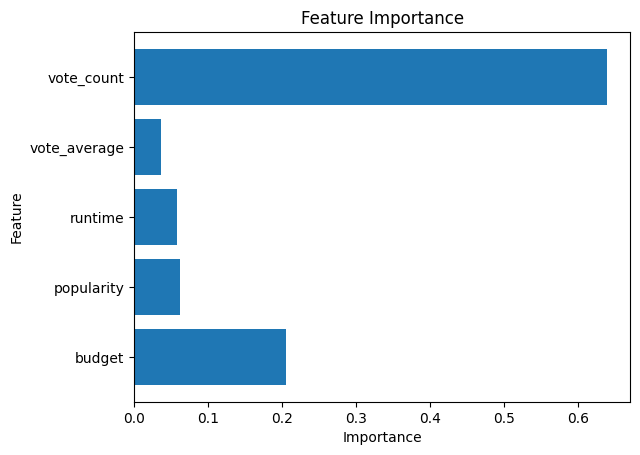

In [113]:
# Feature importance (optional)
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
plt.barh(features, feature_importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

In [96]:
#Reset the index to create a column for the index
movies_data = df.reset_index()[
    ["index", "title", "overview"]
]  # Now 'index' is a column

# Step 2: Vectorize the 'overview' column using TF-IDF
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(movies_data["overview"].fillna(""))

# Step 3: Apply KMeans Clustering
n_clusters = 5  # Define the number of clusters, can be adjusted
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Step 4: Add the cluster labels to the movies data
movies_data["cluster"] = kmeans.labels_


# Step 5: Movie Recommendation Function
def recommend_movies(movie_name, movies_data, top_n=30):
    """
    Recommends movies based on KMeans clustering.

    Parameters:
    - movie_name (str): The name of the movie to find recommendations for.
    - movies_data (pd.DataFrame): DataFrame with 'index', 'title', 'overview', and 'cluster' columns.
    - top_n (int): Number of recommendations to display.
    """
    list_of_all_titles = movies_data["title"].tolist()
    close_matches = difflib.get_close_matches(movie_name, list_of_all_titles)

    if not close_matches:
        print("No similar movies found.")
        return

    closest_match = close_matches[0]
    movie_index = movies_data[movies_data["title"] == closest_match].index[0]

    # Get the cluster of the selected movie
    movie_cluster = movies_data.iloc[movie_index]["cluster"]

    # Get movies in the same cluster
    similar_movies = movies_data[movies_data["cluster"] == movie_cluster]

    # Display top recommendations from the same cluster
    print(
        f"\nMovies suggested for you based on '{closest_match}' (Cluster {movie_cluster}):\n"
    )
    for i, movie in enumerate(similar_movies.head(top_n).iterrows()):
        _, row = movie
        print(f"{i + 1}. {row['title']}")


# Example Usage
if __name__ == "__main__":
    # Input movie name
    movie_name = input("Enter your favorite movie name: ")
    recommend_movies(movie_name, movies_data)

Enter your favorite movie name: Missin: Impossible

Movies suggested for you based on 'Mission: Impossible' (Cluster 2):

1. Avatar
2. Spectre
3. John Carter
4. Tangled
5. Avengers: Age of Ultron
6. Quantum of Solace
7. Pirates of the Caribbean: Dead Man's Chest
8. The Lone Ranger
9. The Avengers
10. Pirates of the Caribbean: On Stranger Tides
11. Men in Black 3
12. The Hobbit: The Battle of the Five Armies
13. Robin Hood
14. The Hobbit: The Desolation of Smaug
15. The Golden Compass
16. Captain America: Civil War
17. Battleship
18. Jurassic World
19. Skyfall
20. Spider-Man 2
21. Iron Man 3
22. Alice in Wonderland
23. X-Men: The Last Stand
24. Monsters University
25. Transformers: Age of Extinction
26. Oz: The Great and Powerful
27. TRON: Legacy
28. Cars 2
29. Green Lantern
30. Toy Story 3


In [97]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.001


In [98]:
# Step 1: Handle missing values
df["overview"] = df["overview"].fillna("No overview available").astype(str)
df["keywords"] = df["keywords"].fillna("No keywords available").astype(str)
df["runtime"] = df["runtime"].fillna(df["runtime"].median())
df["vote_average"] = df["vote_average"].fillna(df["vote_average"].mean())
df["vote_count"] = df["vote_count"].fillna(df["vote_count"].mean())

# Step 2: Prepare TF-IDF matrix
tfidf = TfidfVectorizer(stop_words="english", max_features=500)  # Larger feature space
tfidf_matrix = tfidf.fit_transform(df["overview"].fillna(""))

# Optional: Dimensionality reduction using Truncated SVD
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Step 3: Determine optimal number of clusters (Elbow Method & Silhouette Analysis)
sse = []
silhouette_scores = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix_reduced)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tfidf_matrix_reduced, kmeans.labels_))

# Select optimal k
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(tfidf_matrix_reduced)
df["cluster"] = kmeans.labels_

Optimal number of clusters: 14


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


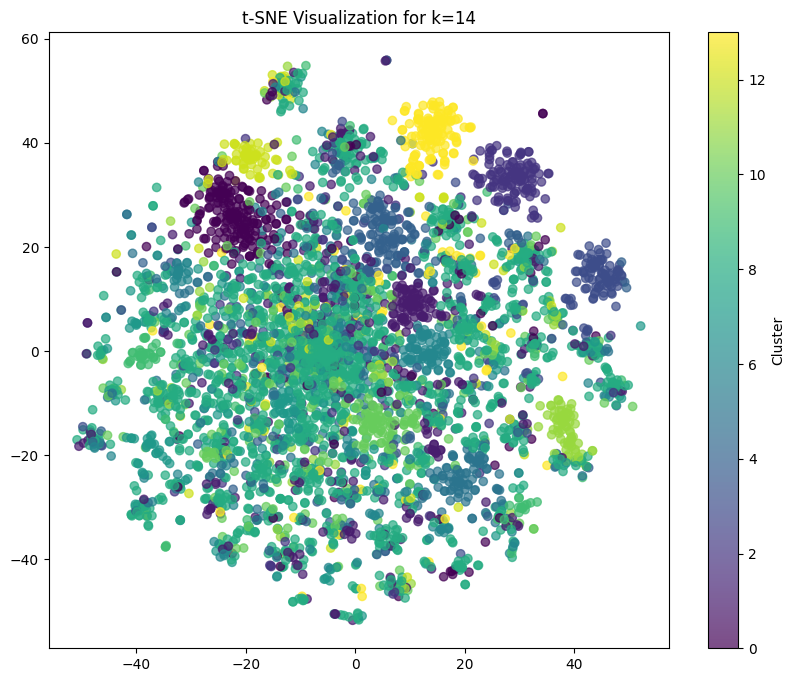

In [99]:
# Step 5: Visualize Clusters (t-SNE)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(tfidf_matrix_reduced)

plt.figure(figsize=(10, 8))
plt.scatter(
    tsne_results[:, 0], tsne_results[:, 1], c=kmeans.labels_, cmap="viridis", alpha=0.7
)
plt.colorbar(label="Cluster")
plt.title(f"t-SNE Visualization for k={optimal_k}")
plt.show()

In [100]:
# Step 6: Movie Recommendation Function
def recommend_movies(movie_name, movies_data, tfidf_matrix, top_n=30):
    """
    Recommends movies based on KMeans clustering and cosine similarity.

    Parameters:
    - movie_name (str): The name of the movie to find recommendations for.
    - movies_data (pd.DataFrame): DataFrame with 'title' and 'cluster' columns.
    - tfidf_matrix (sparse matrix): TF-IDF matrix of the movies' overviews.
    - top_n (int): Number of recommendations to display.
    """
    # Find closest movie title
    list_of_all_titles = movies_data["title"].tolist()
    close_matches = difflib.get_close_matches(movie_name, list_of_all_titles)

    if not close_matches:
        print("No similar movies found.")
        return

    closest_match = close_matches[0]
    print(f"\nRecommendations based on '{closest_match}':\n")

    # Get index of the closest movie
    movie_index = movies_data[movies_data["title"] == closest_match].index[0]

    # Calculate cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix[movie_index], tfidf_matrix).flatten()

    # Sort movies by similarity within the same cluster
    movie_cluster = movies_data.iloc[movie_index]["cluster"]
    cluster_movies = movies_data[movies_data["cluster"] == movie_cluster].copy()
    cluster_movies["similarity"] = cosine_sim[cluster_movies.index]
    recommendations = cluster_movies.sort_values(by="similarity", ascending=False)

    # Display top recommendations
    for i, row in recommendations.head(top_n).iterrows():
        print(f"{i + 1}. {row['title']}")


# Step 7: Test Recommendation System
movies_data = df[["title", "overview", "cluster"]].reset_index()
movie_name = input("Enter your favorite movie name: ")
recommend_movies(movie_name, movies_data, tfidf_matrix)

Enter your favorite movie name: Tekken

Recommendations based on 'Taken':

1816. Taken
3333. Harry Brown
870. You, Me and Dupree
4100. Harsh Times
1119. The Mechanic
283. True Lies
1963. Jane Got a Gun
4781. Dutch Kills
2280. Bad Teacher
205. Fast Five
726. The Shaggy Dog
2620. Post Grad
2640. District B13
4272. Trees Lounge
1250. Torque
3806. Purple Violets
1812. Mrs. Doubtfire
2748. The Big Hit
1576. Hope Floats
585. Wolf
3174. Boiler Room
4776. Funny Ha Ha
825. The Pursuit of Happyness
1245. Renaissance Man
2184. Home for the Holidays
141. White House Down
4651. Exam
2246. The Brothers Bloom
903. Jerry Maguire
3756. The Wash


In [101]:
# Compute Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.014


In [102]:
# Step 1: Fill Missing Values
df["overview"] = df["overview"].fillna("").astype(str)
df["keywords"] = df["keywords"].fillna("").astype(str)
df["runtime"] = df["runtime"].fillna(df["runtime"].median())
df["vote_average"] = df["vote_average"].fillna(df["vote_average"].mean())
df["vote_count"] = df["vote_count"].fillna(df["vote_count"].mean())

# Step 2: Feature Extraction
# TF-IDF for 'overview' and 'keywords'
tfidf_overview = TfidfVectorizer(
    stop_words="english", max_features=2000, ngram_range=(1, 2)
)
overview_tfidf = tfidf_overview.fit_transform(df["overview"])

tfidf_keywords = TfidfVectorizer(stop_words="english", max_features=500)
keywords_tfidf = tfidf_keywords.fit_transform(df["keywords"])

# Numerical Features: runtime, vote_average, vote_count
numerical_features = df[["runtime", "vote_average", "vote_count"]].values

# Combine All Features
combined_features = hstack([overview_tfidf, keywords_tfidf, numerical_features])

# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=100, random_state=42)
reduced_features = pca.fit_transform(combined_features.toarray())

# Step 4: KMeans Clustering
optimal_k = 7  # Adjust based on prior Elbow Method and Silhouette Score analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init="k-means++", max_iter=500)
cluster_labels = kmeans.fit_predict(reduced_features)

# Step 5: Add Clustering Results to DataFrame
df["cluster"] = cluster_labels

# Step 6: Evaluate Clustering (Silhouette Score)
silhouette_avg = silhouette_score(reduced_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.6407


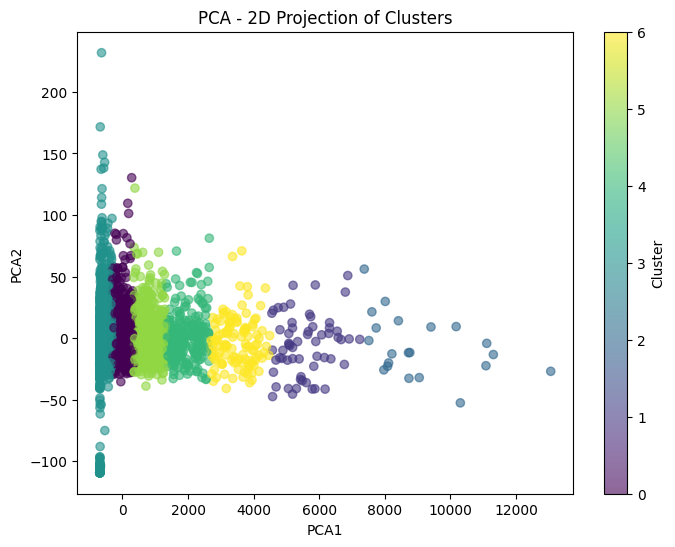

In [103]:
# Step 7: Visualize Clusters with PCA (2D Projection)
pca_2d = PCA(n_components=2)
reduced_2d = pca_2d.fit_transform(reduced_features)

plt.figure(figsize=(8, 6))
plt.scatter(
    reduced_2d[:, 0], reduced_2d[:, 1], c=cluster_labels, cmap="viridis", alpha=0.6
)
plt.colorbar(label="Cluster")
plt.title("PCA - 2D Projection of Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [104]:
# Step 8: Movie Recommendation System
from difflib import get_close_matches


def recommend_movies(movie_name, movies_data, top_n=30):
    """
    Recommends movies based on KMeans clustering.

    Parameters:
    - movie_name (str): The name of the movie to find recommendations for.
    - movies_data (pd.DataFrame): DataFrame with 'title', 'overview', and 'cluster' columns.
    - top_n (int): Number of recommendations to display.
    """
    list_of_all_titles = movies_data["title"].tolist()
    close_matches = get_close_matches(movie_name, list_of_all_titles)

    if not close_matches:
        print("No similar movies found.")
        return

    closest_match = close_matches[0]
    movie_index = movies_data[movies_data["title"] == closest_match].index[0]

    # Get the cluster of the selected movie
    movie_cluster = movies_data.iloc[movie_index]["cluster"]

    # Get movies in the same cluster
    similar_movies = movies_data[movies_data["cluster"] == movie_cluster]

    # Display top recommendations from the same cluster
    print(
        f"\nMovies suggested for you based on '{closest_match}' (Cluster {movie_cluster}):\n"
    )
    for i, movie in enumerate(similar_movies.head(top_n).iterrows()):
        _, row = movie
        print(f"{i + 1}. {row['title']}")


# Example Usage of Recommendation Function
movies_data = df.reset_index()[
    ["index", "title", "overview", "cluster"]
]  # Ensure 'title' column exists
movie_name = input("Enter your favorite movie name: ")
recommend_movies(movie_name, movies_data)

Enter your favorite movie name: Star

Movies suggested for you based on 'Stardust' (Cluster 5):

1. Superman Returns
2. The Chronicles of Narnia: Prince Caspian
3. Robin Hood
4. The Golden Compass
5. The Good Dinosaur
6. A Christmas Carol
7. Monsters vs Aliens
8. The Mummy: Tomb of the Dragon Emperor
9. Evan Almighty
10. G.I. Joe: The Rise of Cobra
11. 47 Ronin
12. Shrek Forever After
13. The Polar Express
14. The Sorcerer's Apprentice
15. Alice Through the Looking Glass
16. The Chronicles of Narnia: The Voyage of the Dawn Treader
17. Pearl Harbor
18. Madagascar: Escape 2 Africa
19. Night at the Museum: Battle of the Smithsonian
20. Bolt
21. Wrath of the Titans
22. Bee Movie
23. Kung Fu Panda 2
24. The Last Airbender
25. White House Down
26. Madagascar 3: Europe's Most Wanted
27. Die Another Day
28. Kung Fu Panda 3
29. Rise of the Guardians
30. The Last Samurai
